## Understanding Backpropagation, Learning Rates, Optimizers, and Gradient Problems

In [2]:
from IPython.display import Image

# Error Backpropagation

* The learning procedure involves the presentation of a set of pairs of input and output patterns, $X=\{x_i\}_{i=1}^N$ and $Y=\{y_j\}_{j=1}^M$. The system uses the input vector to produce its own output vector and then compares this with the \emph{desire output}, or \emph{target output} $t=\{t_j\}_{j=1}^M$. If there is no difference, no learning takes place. Otherwise, the weights are changed to reduce the difference. This procedure is basically the perceptron learning algorithm.

* This procedure can be *automated* by the machine itself, without any outside help, if we provide some **feedback** to the machine on how it is doing. The feedback comes in the form of the definition of an *error criterion* or *objective function* that must be *minimized* (e.g. Mean Squared Error). For each training pattern we can define an error ($\epsilon_k$) between the desired response ($d_k$) and the actual output ($y_k$). Note that when the error is zero, the machine output is equal to the desired response. This learning mechanism is called **(error) backpropagation** (or **BP**).

* The backpropagation algorithm consists of two phases: 
     * **Forward phase:** computes the *functional signal*, feed-forward propagation of input pattern signals through the network.
    * **Backward phase:** computes the *error signal*, propagates the error backwards through the network starting at the output units (where the error is the difference between desired and predicted output values).
    
    * **Objective function/Error Criterion:** there are many possible definitions of the error, but commonly in neuro-computing one uses the error variance (or power):

\begin{align*}
J(w) = \frac{1}{2}\sum_{k=1}^N \epsilon^2 = \frac{1}{2} \sum_{k=1}^N (d_k-y_k)^2 = \frac{1}{2} \sum_{k=1}^N (d_k-w^Tx_k)^2
\end{align*}

* Now we need to define an **adaptive learning** algorithm. Backpropagation commonly uses the gradient descent as the adaptive learning algorithm.

* **Adaptive Learning Algorithm:** there are many learning algorithms, the most common is the method of Gradient/Steepest Descent.
    * Move in direction opposite to the gradient, $\nabla J(\mathbf{w})$, vector (**gradient descent**):

\begin{align*}
w^{(n+1)} &= w^{(n)} + \Delta w^{(n)}
\end{align*}

This is known as the **error correction rule**. We define: 

\begin{align*}
\Delta w^{(n)} &= w^{(n)} - w^{(n-1)}\\
\Delta w^{(n)} &= - \eta \nabla J(w^{(n)})
\end{align*}

where $\eta$ is the learning rate.

## Backpropagation of the Error for the Output Layer

There are many approaches to train a neural network. One of the most commonly used is the **Error Backpropagation Algorithm**. 

Let's first consider the output layer:
* Given a training set, $\left\{ x_n, d_n\right\}_{n = 1}^N$, we want to find the parameters of our network that minimizes the squared error: 

\begin{align*}
J(w) = \frac{1}{2} \sum_{l=1}^N (d_l - y_l)^2
\end{align*}

* In order to use gradient descent, we need to compute the analytic form of the gradient, $\frac{\partial J}{\partial w_{lj}}$.

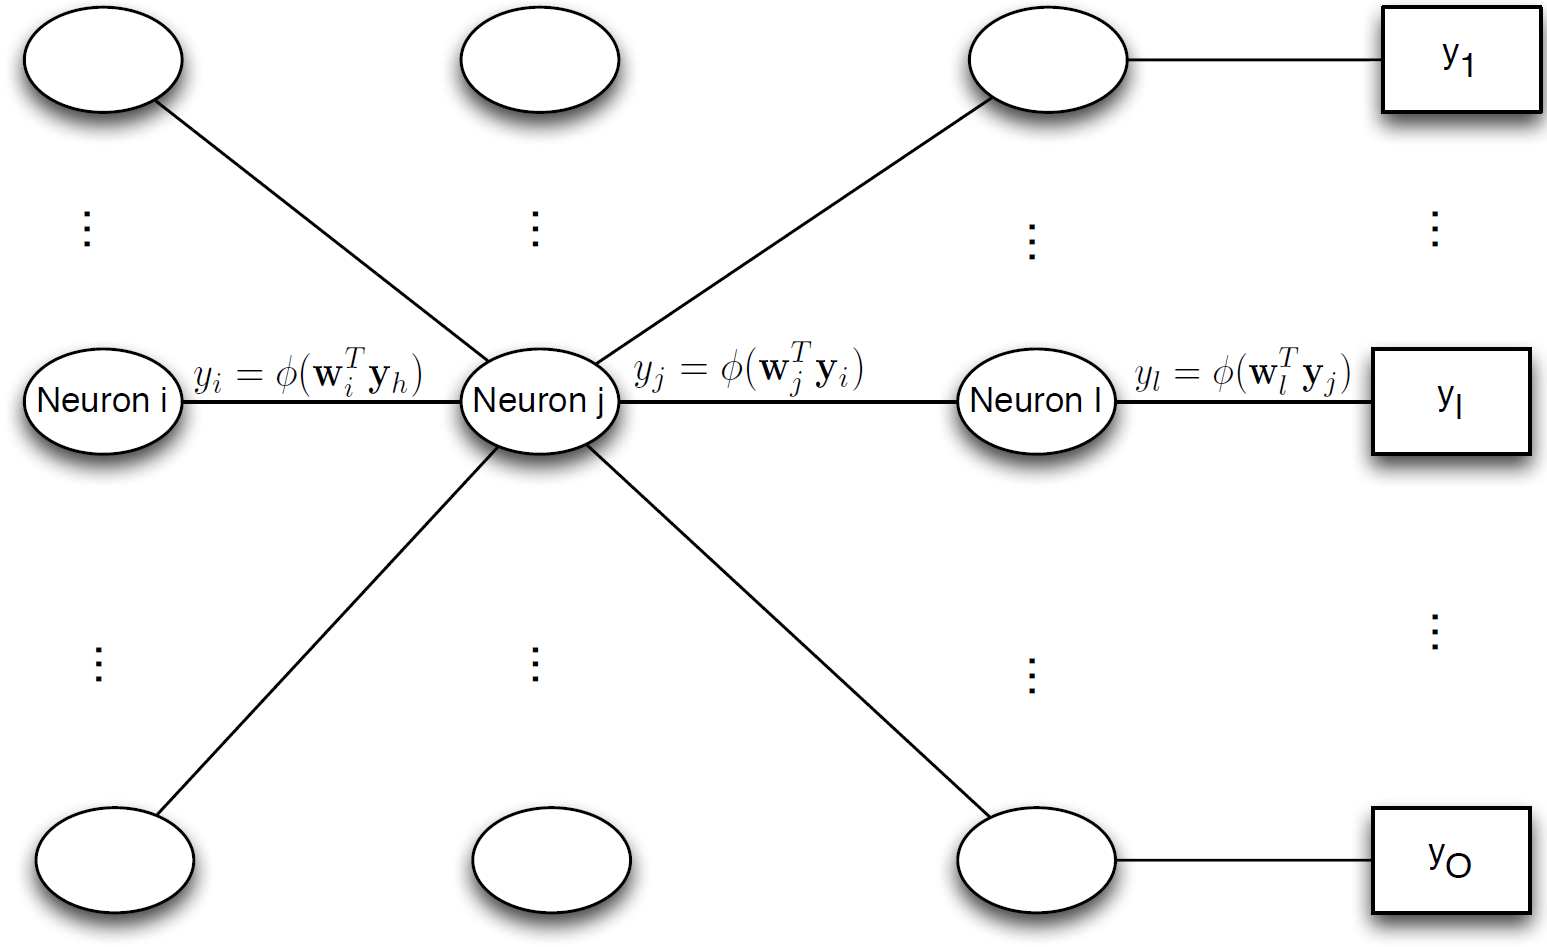

In [3]:
Image('images/HiddenLayer.png',width=700)

<div class="alert alert-info">
    <b>Chain Rule</b>

Given a labelled training set, $\left\{ x_n, d_n\right\}_{n = 1}^N$, consider the objetive function 

\begin{align*}
J(w) = \frac{1}{2} \sum_{l=1}^N e_l^2
\end{align*}

where $w$ are the parameters to be estimated and $\forall l$: 

\begin{align*}
e_l &= d_l - y_l \\
y_l &= \phi(v_l)\text{, }\phi(\bullet)\text{ is an activation function}\\
v_l &= w^Tx_j\text{ (note that }x_j\in\mathbb{R}^{D+1}\text{)}  
\end{align*}

Using the Chain Rule, we find:

\begin{align*}
\frac{\partial J}{\partial w_{lj}} = \frac{\partial J}{\partial e_l} \frac{\partial e_l}{\partial y_l} \frac{\partial y_l}{\partial v_l} \frac{\partial v_l}{\partial w_{lj}}
\end{align*}

where
\begin{align*}
\frac{\partial J}{\partial e_l} = \frac{1}{2} 2 e_l = e_l = d_l - y_l
\end{align*}

\begin{align*}
\frac{\partial e_l}{\partial y_l} = -1
\end{align*}

\begin{align*}
\frac{\partial y_l}{\partial v_l} = \frac{\partial \phi(v_l)}{\partial v_l} = \phi'(v_l)
\end{align*}

\begin{align*}
\frac{\partial v_l}{\partial w_{lj}} = x_j
\end{align*}

Therefore

\begin{align*}
\frac{\partial J}{\partial w_{lj}} = e_l (-1) \phi'(v_l) x_j
\end{align*}

</div>

* If activation function is the sigmoid, $\phi(x) = \frac{1}{1+e^{-x}}$, then $\phi'(x) = \phi(x)(1-\phi(x))$

* If activation function is the hyperbolic tangent (tanh), $\phi(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$, then $\phi'(x) = 1-\phi(x)^2$

* If activation function is the ReLU, $\phi(x) = \begin{cases}0, & x \leq 0 \\ x, & x>0 \end{cases}$, then $\phi'(x) = \begin{cases}0, & x \leq 0 \\ 1, & x>0 \end{cases}$


Now that we have the gradient, how do we use this to update the output layer weights in our MLP?

\begin{align*}
w_{lj}^{(t+1)} = w_{lj}^{(t)} - \eta \frac{\partial J}{\partial w_{lj}} = w_{lj}^{(t)} + \eta e_i\phi'(v_l) x_j
\end{align*}

## Backpropagation of the Error for the Hidden Layers

* In a neural network, we can only define an error at the output layer! Therefore, we need to backward propagate the error obtain at the output layer, hence *backpropagation*.

Suppose we want to update $w_{ji}$ where $j$ is the hidden layer. (Let's follow the labeling in the figure below.)

The error objective function overall $N$ data points is 

\begin{align*}
J(w) = \frac{1}{2} \sum_{l=1}^N e_l^2 = \frac{1}{2} \sum_{l=1}^N \left(d_l - y_l\right)^2 = \frac{1}{2} \sum_{l=1}^N \left(d_l - \phi_l(v_l)\right)^2
\end{align*}

<div class="alert alert-info">
    <b>Chain Rule</b>

As we have seen earlier,

\begin{align*}
\frac{\partial J}{\partial w_{lj}} &= \frac{\partial J}{\partial e_l} \frac{\partial e_l}{\partial y_l} \frac{\partial y_l}{\partial v_l} \frac{\partial v_l}{\partial w_{lj}} \\
&= e_l (-1) \phi'(v_l) y_{jl}
\end{align*}

Let's define the *local gradient* $\delta_l$:

\begin{align*}
\delta_l &= -\frac{\partial J}{\partial v_l} \\
&= e_l \phi'(v_l)
\end{align*}

Similarly,

\begin{align*}
\delta_j &= -\frac{\partial J}{\partial v_j} \\
&= -\frac{\partial J}{\partial y_j} \frac{\partial y_j}{\partial v_j} \\
&= -\frac{\partial J}{\partial y_j} \phi'(v_j)
\end{align*}

Note that,

\begin{align*}
\frac{\partial J}{\partial y_j} &= \sum_l \frac{\partial J}{\partial e_l} \frac{\partial e_l}{\partial y_l} \frac{\partial y_l}{\partial v_l} \frac{\partial v_l}{\partial y_j} \\
&= \sum_l e_l (-1) \phi'(v_l) w_{lj} \\
\end{align*}

So,

\begin{align*}
\delta_j &= -\frac{\partial J}{\partial y_j} \phi'(v_j) \\
&= - \left[ \sum_l e_l (-1) \phi'(v_l) w_{lj} \right] \phi'(v_j) \\
&= \phi'(v_j)\sum_l \delta_l w_{lj}
\end{align*}

* We can write the gradient at a hidden neuron in terms of the local gradient and the connect neurons in the next layer:

\begin{align*}
\Delta w_{ij} = \eta \delta_j x_i
\end{align*}

And so,

\begin{align*}
w_{ij}^{t+1} \leftarrow w_{ij}^{t} + \Delta w_{ij}^{t}
\end{align*}
    
</div>

## Backpropagation algorithm via code

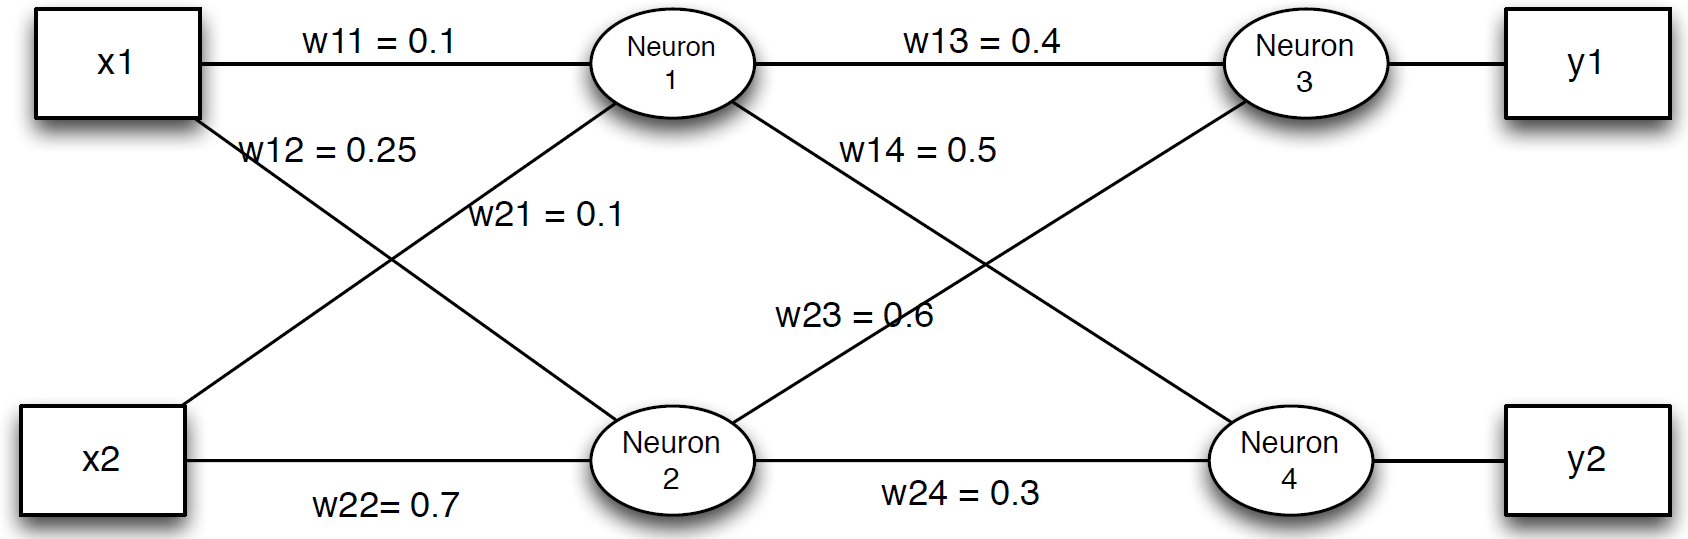

In [14]:
from IPython.display import Image
Image('images/network.png', width=900)

All weights are initialized to the values shown (and there are no biases for simplicity). Consider the data point $x=[1,1]^T$ with desired output vector $d=[1,0]^T$. Complete one iteration of backpropagation by hand assuming a learning rate of $\eta=0.1$. 

What would all the weight values be after one backpropagation iteration? Show your work. 

Use the sigmoid activation function: $\phi(x) = \frac{1}{1 + e^{-x}}$. Note that $\frac{d\phi(x)}{dx}=\phi'(x) = \phi(x)(1-\phi(x))$.

w11: 0.1
w12: 1.1221510208869199
w21: 1.0763449797252718
w22: 1.572151020886916
w14: -2.494504270544189
w24: -3.7405991697959475


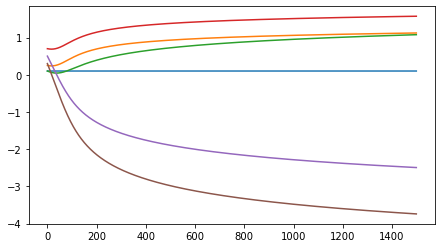

In [45]:
import math
def back(x1, x2, epochs):
    w11 = 0.1
    w12 = 0.25
    w21 = 0.1
    w22 = 0.7
    
    w13 = 0.4
    w14 = 0.5
    w23 = 0.6
    w24 = 0.3
    
    a11 = []
    a12 = []
    a21 = []
    a22 = []
    a14 = []
    a24 = []
        
    for x in range(0,epochs):

        # Forward propagate
        v1 = w11 * x1 + w21 * x2
        v2 = w12 * x1 + w22 * x2

        y1 = 1/(1+math.exp(-v1))
        y2 = 1/(1+math.exp(-v2))

        v3 = w13 * y1 + w23 * y2
        v4 = w14 * y1 + w24 * y2

        y3 = 1/(1+math.exp(-v3))
        y4 = 1/(1+math.exp(-v4))

        eta = 0.1
    
        # Back propagate (Note some weights are missing due to problem constraint)
        wn14 = w14 + eta * -1 * y4 * (1-y4) * y1
        wn24 = w24 + eta * -1 * y4 * (1-y4) * y2

        wn11 = w11 + eta * (0 + -1 * y4 * (1-y4) * wn14) * y1 * (1-y1) * x1
        wn12 = w12 + eta * (0 + -1 * y4 * (1-y4) * wn24) * y2 * (1-y2) * x2
        wn21 = w21 + eta * (0 + -1 * y4 * (1-y4) * wn14) * y1 * (1-y1) * x1
        wn22 = w22 + eta * (0 + -1 * y4 * (1-y4) * wn24) * y2 * (1-y2) * x2

        # Update weights for each epoch
        
        a11.append(w11)
        a12.append(w12)
        a21.append(w21)
        a22.append(w22)
        a14.append(w14)
        a24.append(w24)
        
        w11 = w11
        w12 = wn12
        w21 = wn21
        w22 = wn22
        w14 = wn14
        w24 = wn24
        
    print("w11: "+str(w11))
    print("w12: "+str(w12))
    print("w21: "+str(w21))
    print("w22: "+str(w22))
    print("w14: "+str(w14))
    print("w24: "+str(w24))
    
    fig = plt.figure(figsize=(16,4))
    ax = fig.add_subplot(121)
    ax.plot(range(0,epochs),a11)
    ax.plot(range(0,epochs),a12)
    ax.plot(range(0,epochs),a21)
    ax.plot(range(0,epochs),a22)
    ax.plot(range(0,epochs),a14)
    ax.plot(range(0,epochs),a24)
    
back(1,1,1500)

# Plot weight to see versus epoch

## Learning Rate

Backpropagation provides an approximation to the trajectory in the weight space computed by the method of **gradient descent**. Learning rate is a hyperparameter that is used to control the rate at which a model can learn on a set of data. Learning rate is typically represented using eta and scales what the weights are updated by.

It is an important task to pick the best learning rate. A large learning rate may help a model train faster at the cost of overshooting past the global minima while a small learning rate may be inefficient or even get stuck in a local minima.

Literature in the field tends to agree that **learning rate is one of the most important parameter** that most should consider when developing machine learning algorithms [Deep Learning (Adaptive Computation and Machine Learning series)].

There is no easy way to calculate the ideal learning rate for a model, instead, **trial and error** must be taken as a heuristic to find the 'best' learning rate given a problem. Typically this can be done by using diagnostic plots to investigate the impact of learning rate on key metrics of a machine learning model such as loss and accuracy. These plots can also be used to tell if a particular learning rate is too noisy.

* The gradient descent is a 1st-order optimization algorithm (uses 1st derivative)

* Other methods can also be used, for example, Newton's method, a 2nd-order optimization algorithm (uses 2nd derivative)

## Optimization Techniques with Gradient Descent

1. **Accelerated Gradient Descent strategies**: (1) add a momentum term, (2) use Nesterov's formula

2. **Adaptive Learning Rate**: (1) AdaGrad, (2) Adam

3. **Gradient Descent for ML**: (1) Stochastic Gradient Descent, (2) Batch/Mini-batch Gradient Descent

1. **Accelerated Gradient Descent**

We can include a **momentum term**: it tries to increase rate of learning while avoiding instability. 

The **Generalized Delta Rule - Delta Rule with momentum** is:

$$\Delta w_{ji}^{(t)} = \alpha \Delta w_{ji}^{(t-1)} - \eta \delta_j^{(t)} y_i^{(t)}$$

where $\alpha$ is usually set to 0.9 or a similar value, and $(t)$ stands for iteration.

Observations:
* $\Delta w_{ji}(n)$ is a the sum of exponentially weighted time series. For it to converge, $0 \leq |\alpha| < 1$
* If $\alpha = 0$, then we are operating without a momentum term

* Inclusion of momentum accelerates descent in steady down-hill directions
* Inclusion of momentum has a stabilizing effect in directions that oscillate in sign
* Momentum may prevent termination/convergence in a shallow/local minimum

* The learning rate *can* be connection dependent, $\eta_{ji}$, we can even set it to zero for some connections
* Yurii Nesterov noticed that as we reach the minima i.e the lowest point on the curve, the momentum is pretty high and it does not know to slow down at that point due to the high momentum which could cause it to miss the minima entirely and continue moving up. He introduced the now called **Nesterov accelerated gradient (NAG)**.

2. **Nesterov Accelerated Gradient (NAG)**

$$w_{ij}^{(t)} = y^{(t)} - \eta \nabla J(y^{(t)})$$

$$y^{(t)} = w_{ij}^{(t)} + \mu (w_{ij}^{(t)} - w_{ij}^{(t-1)})$$

* **Gradient Descent with momentum**: (1) computes the gradient at current location, and then (2) to that gradient, adds a momentum step in the direction of the previous gradient.

* **NAG**: (1) adds a momentum term in the direction of the previous gradient, and then (2) computes the gradient at that location.

3. **Adaptive Learning Rate**

In addition to being able to speed up Gradient Descent, we can also **update the learning rate** to perform larger or smaller updates depending on their importance.

$$\Delta w_{ij}^{(t)} = - \eta^{(t)} \nabla J(w_{ij}^{(t)})$$

* **AdaGrad ([Adaptive Gradient algorithm, 2011](https://jmlr.org/papers/volume12/duchi11a/duchi11a.pdf))**: It simply allows the learning rate to decrease based on the parameters of the network. So it makes big updates for infrequent parameters, and small updates for frequent parameters. For this reason, it is well-suited for dealing with sparse data. Its main weakness is that its learning rate is always decreasing and decaying.

* **RMSProp ([Root Mean Squared Progagation algorithm, 2012](http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)):** RMSProp is also a method in which the learning rate is adapted for each of the parameters in the network. The idea is to divide the learning rate for a parameter by a running average of the magnitudes of recent gradients for that weight.

* **Adam ([Adaptive Moment Estimation, 2015](https://arxiv.org/abs/1412.6980)):** Adam combines RMSProp and momentum learning. It is by far the most common method used today. Adam also computes adaptive learning rates for each parameter of the network. In this optimization algorithm, running averages of both the gradients and the second moments of the gradients are used.

# Resilient propagation (RProp)

Before we understand RMS prop it is important to understand Rprop (Resilient Propagation). Due to the variability in gradient size it is very difficult to find the single best learning rate. If we use full-batch learning we can guarantee that all weight updates are of the same size. Rprop combines the concept of using the sign of the gradient with the idea of using adaptive step size for each weight.

Essentially the steps are as follows:

1. Increase the step size for a weight multiplicatively (eg weight * 1.2) if the signs of the last two gradients agree
2. Otherwise decrease the step size multiplicatively (eg weight * 0.5)
3. Limit the step sizes to be less be between a millionth and 50

However, one limitation of RProp is that it **does not work well with mini-batch learning** which is needed for large datasets. For example, given a situation in which a weight that gets a gradient of +0.1 on nine mini-batches and a gradient of -0.9 on the tenth mini-batch, ideally we would want the weight to stay where it is as they should logically cancel. However, with Rprop, this would increment the weight 9 times and decrement it once by roughly the same amount. This weakness occurs because Rprop only takes into account the sign of the weight and not the magnitude of the gradient leading to the weights to become very big.

Thus there was a need to find an algorithm that could combine: 

1. The robustness of rprop
2. The efficiency of mini-batches
3. The effective averaging of gradients over mini-batches.

## Root Mean Squared Progagation Algorithm (RMS Prop)

Luckily there is a way to solve this using a moving average of the squared gradient for each weight to scale across mini-batches. This yields us RMSProp which is another method in which the learning rate is adapted for each parameter. 

Note: beta is a 'forgetfullness' parameter that controls the amount of gradients we are calculating over

$$MeanSquare(w, t) = \beta * MeanSquare(w, t-1)+(1-\beta) * (\delta E/ \delta w^t))^2$$

We can divide the learning rate by the root of the MeanSquare to obtain the RMS prop update equation. This solves the problem of exploding gradients that can be seen with Rprop and yields:

$$\Delta w^t_{ij} = \Delta w_{ji}^{(t-1)} - \frac{\eta}{\sqrt{MeanSquare(w, t)}} * \nabla w_{ji}^{(t-1)} $$

## Adaptive Moment Estimation Prop (Adam)

Both RMSProp and Adagrad approach the problem of optimization using constrasting approaches. However, Adam takes advatanges of the strengths of both and combines heuristics of both algorithms. Adam first calculates the 1st and 2nd moment of a gradient, and themn it uses a bias-corrected 1st and 2nd moment to update the parameters and weights of a neuron. This leads to a optimization algorithm that is very fast, very cheap, and good at tackling a wide set of data.

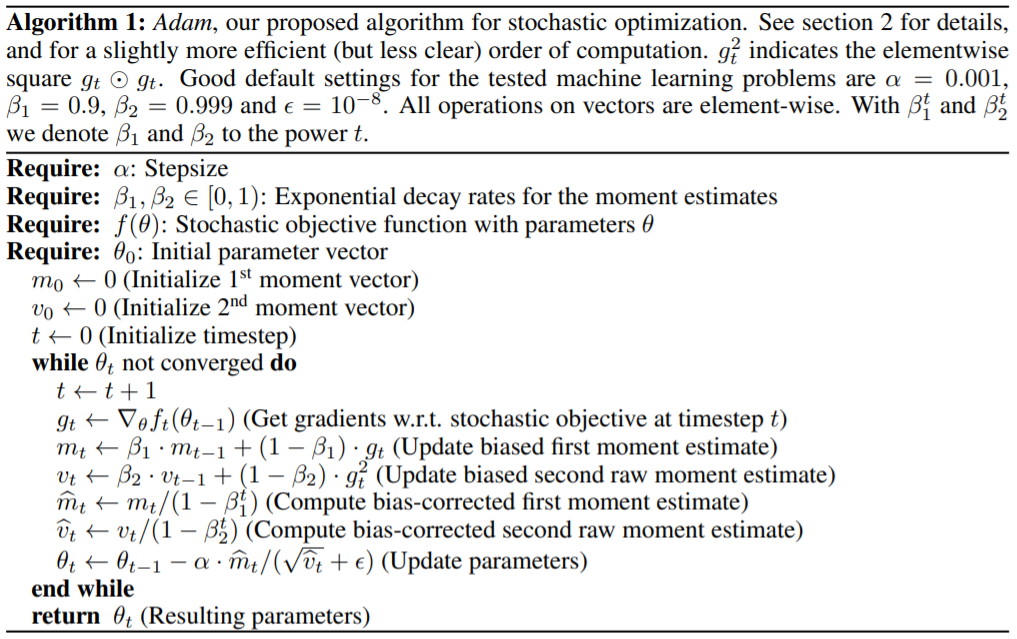

In [18]:
Image('images/adam.png',width=700)

## Vanishing Gradient Problem/Exploding Gradient problem

**The vanishing gradient** problem can be encountered when training ANN with backpropgation. Essentially, because backpropagation involves calculating the derivatives of a model layer by layer, certain activation functions such as the sigmoid function can cause the gradients in the hidden layer to become very very small. This leads to very slow training of the ANN and low generalizability.

There are a multiple solution to the vanishing gradient problem. 

1. One is the use of activation functions that aren't prone to causing the vanishing gradient problem such as ReLU. 
2. Another is the use of residual networks as they bypass the layers and prevent the gradients from getting squished as they progress through a function.
3. Lastly, batch normalization layers can solve this as well by normalizing the input of the activation function to prevent diminishing returns found at the outer edges of a sigmoid function.

**The exploding gradient** problem much like the vanishing gradient problem also occurrs due to the nature of backpropagation. Essentially this occurrs due to the opposite reasons found in the vanishing gradient problem. As the gradient is backpropagated, if the gradient is greater than 1, this can lead to a gradient that gets exponentially bigger as it passes backwards through the model. This can lead to instability of an ANN and a model that cannot learn from the training data.

There are a multiple solution to the exploding gradient problem. 

1. Applying Occam's Razor and simplifying the network model to have fewer layers can help alleviate this problem.
2. Using gradient clipping which essentially sets the gradient to a max allowable value if it exceeds it.
3. Weight regularization that penalizes large weights can also deter the exploding gradient from occurring.

## Batch Normalization

Training ANN with a large sum of layers can be very challenging as they can be very sensitive to the initialization of weights and the learning algorithm that is used. A theory that could cause this challenge is what is referred to as *internal covariate shift*. What this refers to is that the distribution of the inputs to layers deep in a model may shift after each mini-batch when the weights are updated. This can cause the network to forever be stuck chasing a goal that keeps shifting. Batch normalization attempts to solve this.

**Batch normalization** is a technique that seeks to attack this problem by standardizing the inputs for each successive mini-batch. While the exact reason how batch normalization works is unknown, it has been noted in literature to have very positive effects when training a model. Batch normalization can dramatically reduce the amount of epochs required of the training model and can also reduce error. One theory behind the reason why batch normalziation causes such positive affects is that normalizing the input is said to make the optimization and learning curve of a weight smoother therefore making it easier and allowing for a faster convergence.

## Transfer Learning 

**Transfer Learning** is a machine learning method where a model that performs well on one task, is reused as a starting point for another task. This approach is especially popular in image classification where the initial layers of pre-trained models are frozen and used for feature extraction while new layers are added on for classification. 

In terms of benefits of transfer learning they can:
* Save the practitioner time training the model.
* Lead to a higher performance than if done from scratch.
* Lowers the amount of data required to get a generalizable model.

In terms of cons of transfer learning:
* You must assume that the distribution of data that you are training on is the same as the model that is being transferred over. If not the model may underperform.
* The problems must be *similar enough* to transfer but this might not always be apperent until a model is trained and tested.
* You have worse flexibility with the model you are working with.

Example in Google Colab: https://colab.research.google.com/github/kylemath/ml4a-guides/blob/master/notebooks/transfer-learning.ipynb

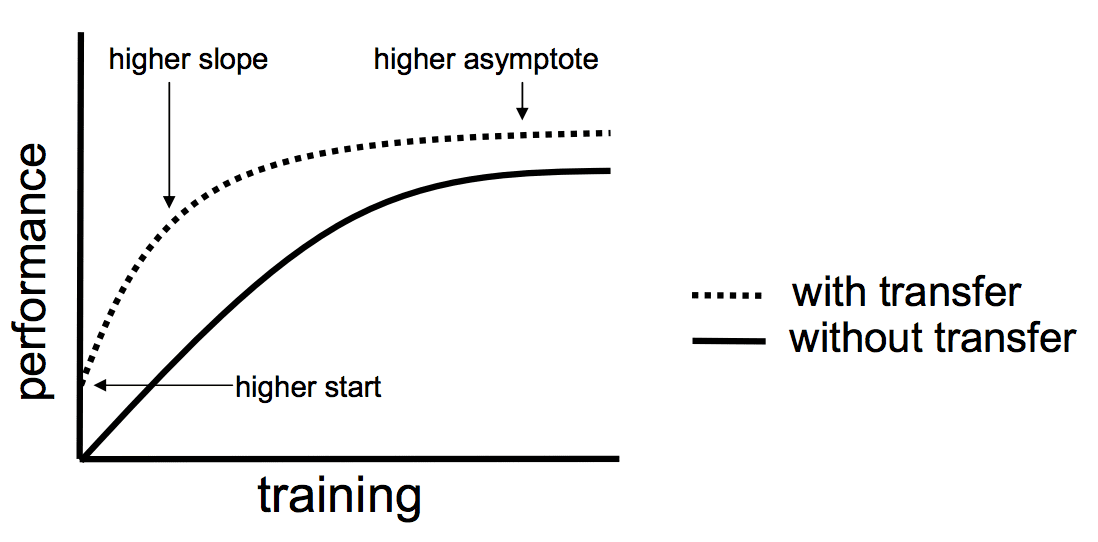

In [23]:
Image('images/transfer_learning.png',width=700)

## UF Mask example of learning rate selection

C:\Users\Justin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


-----------------------------------
Hidden Layer Architecture:  (18, 2)
Learning Rate:  0.01
Number of Epochs:  1000
Accuracy =  98.9 %
-----------------------------------


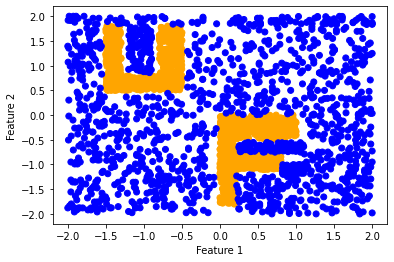

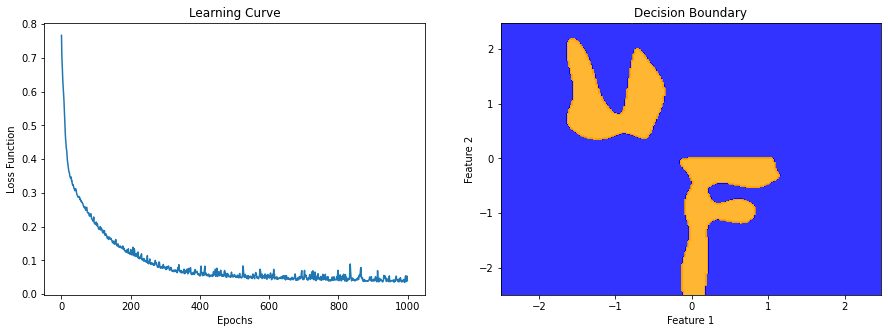

C:\Users\Justin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


-----------------------------------
Hidden Layer Architecture:  (18, 2)
Learning Rate:  0.01
Number of Epochs:  500
Accuracy =  77.43 %
-----------------------------------


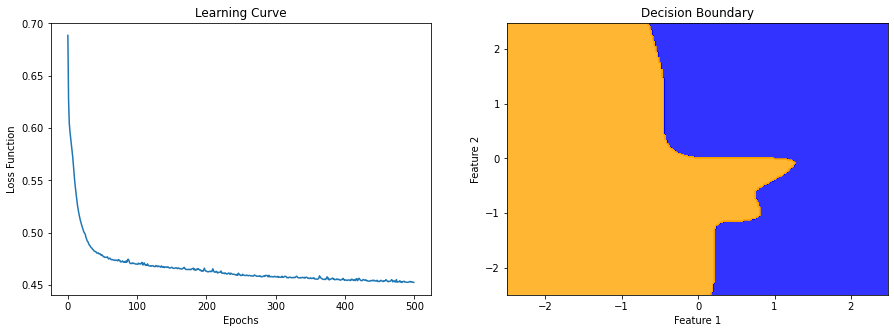

C:\Users\Justin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


-----------------------------------
Hidden Layer Architecture:  (18, 2)
Learning Rate:  0.01
Number of Epochs:  200
Accuracy =  91.97 %
-----------------------------------


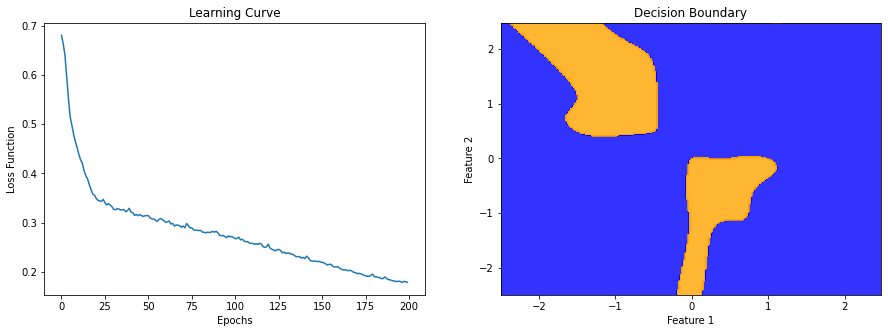

C:\Users\Justin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


-----------------------------------
Hidden Layer Architecture:  (18, 2)
Learning Rate:  0.001
Number of Epochs:  1000
Accuracy =  91.9 %
-----------------------------------


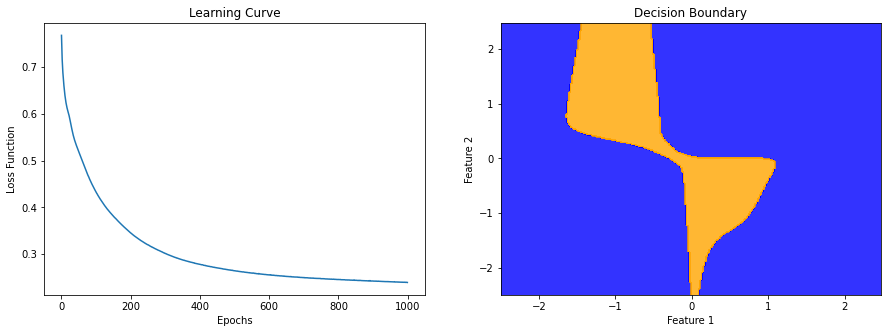

C:\Users\Justin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


-----------------------------------
Hidden Layer Architecture:  (18, 2)
Learning Rate:  0.001
Number of Epochs:  500
Accuracy =  89.83 %
-----------------------------------


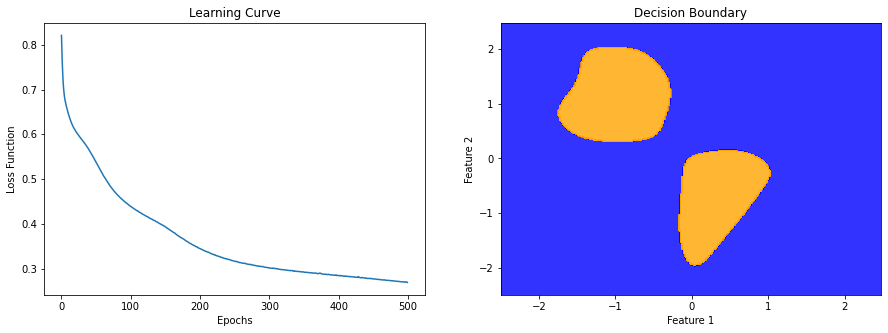

C:\Users\Justin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


-----------------------------------
Hidden Layer Architecture:  (18, 2)
Learning Rate:  0.001
Number of Epochs:  200
Accuracy =  87.6 %
-----------------------------------


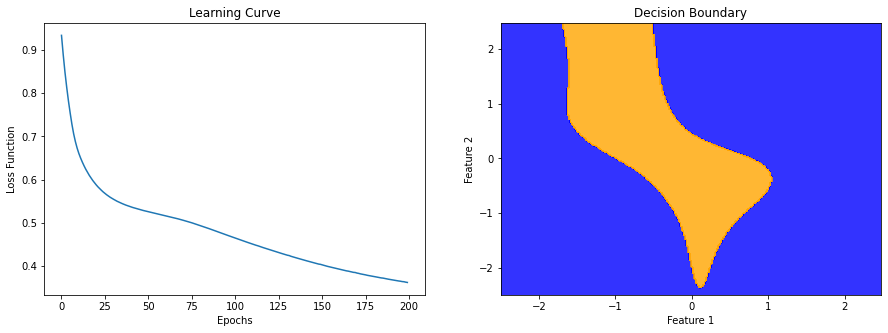

C:\Users\Justin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


-----------------------------------
Hidden Layer Architecture:  (18, 2)
Learning Rate:  0.1
Number of Epochs:  1000
Accuracy =  89.87 %
-----------------------------------


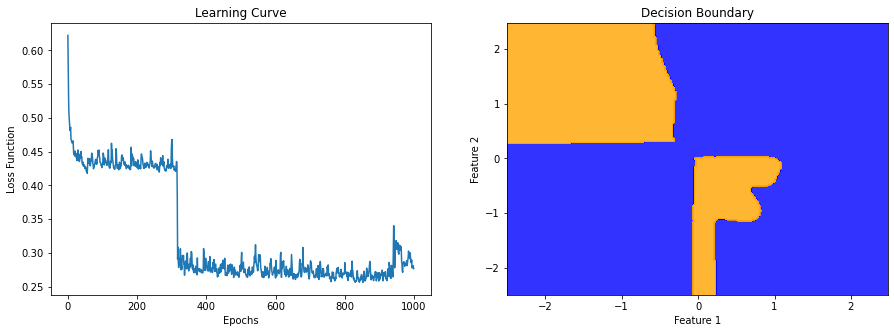

C:\Users\Justin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


-----------------------------------
Hidden Layer Architecture:  (18, 2)
Learning Rate:  0.1
Number of Epochs:  500
Accuracy =  97.67 %
-----------------------------------


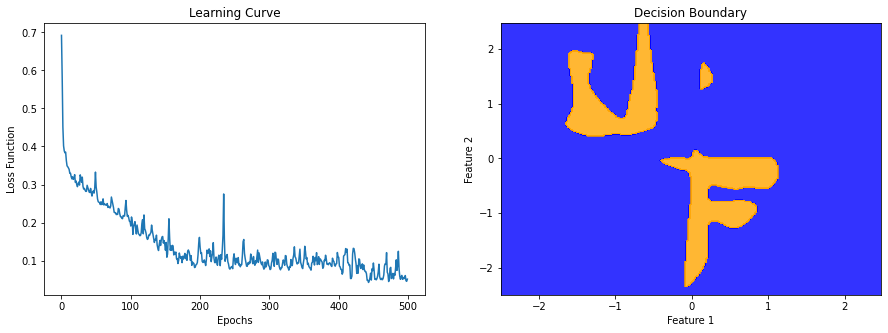

C:\Users\Justin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


-----------------------------------
Hidden Layer Architecture:  (18, 2)
Learning Rate:  0.1
Number of Epochs:  200
Accuracy =  91.37 %
-----------------------------------


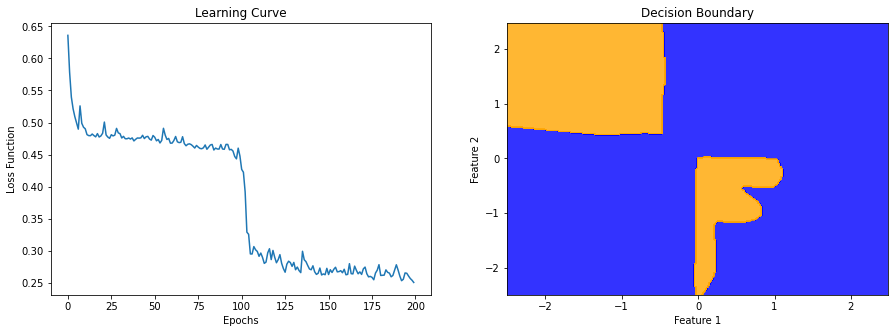

In [22]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt 

UF_network = np.load('UF_network.npy')
X = UF_network[:,:2]
y = UF_network[:,2]

cm = ListedColormap(['blue', 'orange'])
plt.scatter(X[:,0],X[:,1],c=y, cmap=cm);
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

def plot_LC_and_DB(X, model):
    '''This function will plot the learning curve and decision boundary
    for a given trained model and training data X.
    model: is a sklearn model structure
    X: training data'''
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))
    
    fig = plt.figure(figsize=(15,5))
    fig.add_subplot(1,2,1)
    plt.plot(model.loss_curve_)
    plt.title('Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss Function')

    cm = ListedColormap(['blue', 'orange'])
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape) 
    fig.add_subplot(1,2,2)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.8);
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show();
    
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Do not change these parameters
net = MLPClassifier(activation='tanh',
                    n_iter_no_change = 1000)

# Create a list with your own set of values for all of these parameters
net_hidden_layers = [(18,2)] #consider a set of parameters
net_learning_rate = [0.01,0.001,0.1]
epochs = [1000,500,200]

for i in net_hidden_layers:
    for j in net_learning_rate:
        for k in epochs:
            net.set_params(hidden_layer_sizes = i, learning_rate_init = j, max_iter = k)
            net.fit(X, y)
            y_pred = net.predict(X)

            acc_score = accuracy_score(y, y_pred)
            print('-----------------------------------')
            print('Hidden Layer Architecture: ', i)
            print('Learning Rate: ', j)
            print('Number of Epochs: ', k)
            print('Accuracy = ', np.round(acc_score*100,2),'%')
            print('-----------------------------------')
            plot_LC_and_DB(X, net)